# **Autograd**

Autograd is a core component of PyTorch that provides automatic differentiation for tensor operations. It enables gradient computation, which is essential for training machine learning models using optimization algorithms like gradient descent.

## Differentiation of **f(x) = x²**



In [10]:
import torch

In [20]:
x = torch.tensor(3.0, requires_grad=True)  # requires_grad specifies that further we will perform differentation on this Tensor
# It Creates a Computation Graph at the backend

In [12]:
y = x**2

In [13]:
print(x)
print(y)

tensor(3., requires_grad=True)
tensor(9., grad_fn=<PowBackward0>)


In [14]:
y.backward()   # automatically computes the dy/dx

In [17]:
x.grad   # returns the answer of 2*x

tensor(6.)

## Differentiation of **y = x², z = sin(x)**


In [21]:
x = torch.tensor(3.0, requires_grad=True)
y = x**2
z = torch.sin(y)

In [22]:
print(x)
print(y)
print(z)

tensor(3., requires_grad=True)
tensor(9., grad_fn=<PowBackward0>)
tensor(0.4121, grad_fn=<SinBackward0>)


In [27]:
z.backward()

In [28]:
x.grad

tensor(-5.4668)

## **Sample Neural Network using AutoGrad**

Below is the NN for a simple Binary Classification model of a Student's Placement based on their CGPA Score

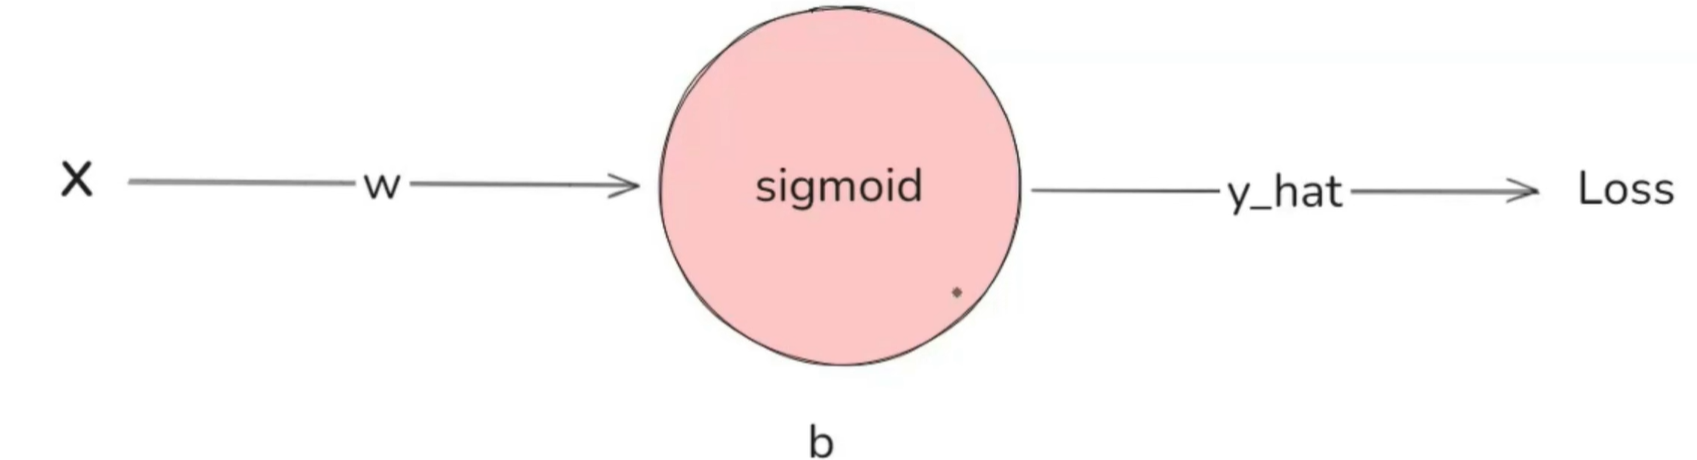



**1. Linear Transformation**

$$
z = w \cdot x + b
$$


**2. Activation (Sigmoid Function)**

$$
y_{\text{pred}} = \sigma(z) = \frac{1}{1 + e^{-z}}
$$


**3. Loss Function (Binary Cross-Entropy)**

$$
L = - \left[ y_{\text{target}} \cdot \ln(y_{\text{pred}}) + (1 - y_{\text{target}}) \cdot \ln(1 - y_{\text{pred}}) \right]
$$

**4. Gradient Using Chain Rule**

We apply the chain rule:

$$
\frac{\partial L}{\partial w} = \frac{\partial L}{\partial y_{\text{pred}}} \cdot \frac{\partial y_{\text{pred}}}{\partial z} \cdot \frac{\partial z}{\partial w}
$$

Step 1: $\frac{\partial L}{\partial y_{\text{pred}}}$

$$
\frac{\partial L}{\partial y_{\text{pred}}} = -\left( \frac{y_{\text{target}}}{y_{\text{pred}}} - \frac{1 - y_{\text{target}}}{1 - y_{\text{pred}}} \right)
$$

Step 2: $\frac{\partial y_{\text{pred}}}{\partial z}$

Using the derivative of the sigmoid:

$$
\frac{\partial y_{\text{pred}}}{\partial z} = y_{\text{pred}}(1 - y_{\text{pred}})
$$

Step 3: $\frac{\partial z}{\partial w}$

$$
\frac{\partial z}{\partial w} = x
$$

**5. Final Expression**

Combining all parts:

$$
\frac{\partial L}{\partial w} = \left[ -\left( \frac{y_{\text{target}}}{y_{\text{pred}}} - \frac{1 - y_{\text{target}}}{1 - y_{\text{pred}}} \right) \right] \cdot y_{\text{pred}}(1 - y_{\text{pred}}) \cdot x
$$

**Simplified Expression**

Alternatively, many implementations simplify the gradient using:

$$
\frac{\partial L}{\partial w} = (y_{\text{pred}} - y_{\text{target}}) \cdot x
$$

This comes from algebraic simplification of the product of those three derivatives.



#### Manual Implementation

In [30]:
import torch

# Inputs
x = torch.tensor(6.7)  # Input feature
y = torch.tensor(0.0)  # True label (binary)

w = torch.tensor(1.0)  # Weight
b = torch.tensor(0.0)  # Bias

In [31]:
# Binary Cross-Entropy Loss for scalar
def binary_cross_entropy_loss(prediction, target):
    epsilon = 1e-8  # To prevent log(0)
    prediction = torch.clamp(prediction, epsilon, 1 - epsilon)
    return -(target * torch.log(prediction) + (1 - target) * torch.log(1 - prediction))

In [32]:
# Forward pass
z = w * x + b  # Weighted sum (linear part)
y_pred = torch.sigmoid(z)  # Predicted probability

# Compute binary cross-entropy loss
loss = binary_cross_entropy_loss(y_pred, y)

In [33]:
loss

tensor(6.7012)

In [34]:
# Derivatives:
# 1. dL/d(y_pred): Loss with respect to the prediction (y_pred)
dloss_dy_pred = (y_pred - y)/(y_pred*(1-y_pred))

# 2. dy_pred/dz: Prediction (y_pred) with respect to z (sigmoid derivative)
dy_pred_dz = y_pred * (1 - y_pred)

# 3. dz/dw and dz/db: z with respect to w and b
dz_dw = x  # dz/dw = x
dz_db = 1  # dz/db = 1 (bias contributes directly to z)

dL_dw = dloss_dy_pred * dy_pred_dz * dz_dw
dL_db = dloss_dy_pred * dy_pred_dz * dz_db

In [35]:
print(f"Manual Gradient of loss w.r.t weight (dw): {dL_dw}")
print(f"Manual Gradient of loss w.r.t bias (db): {dL_db}")

Manual Gradient of loss w.r.t weight (dw): 6.691762447357178
Manual Gradient of loss w.r.t bias (db): 0.998770534992218


#### Using AutoGrad

In [36]:
x = torch.tensor(6.7)
y = torch.tensor(0.0)

In [37]:
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

In [38]:
z = w*x + b
z

tensor(6.7000, grad_fn=<AddBackward0>)

In [39]:
y_pred = torch.sigmoid(z)
y_pred

tensor(0.9988, grad_fn=<SigmoidBackward0>)

In [40]:
loss = binary_cross_entropy_loss(y_pred, y)
loss

tensor(6.7012, grad_fn=<NegBackward0>)

In [41]:
loss.backward()

In [42]:
print(w.grad)
print(b.grad)

tensor(6.6918)
tensor(0.9988)


Sample Computation Graph for the above
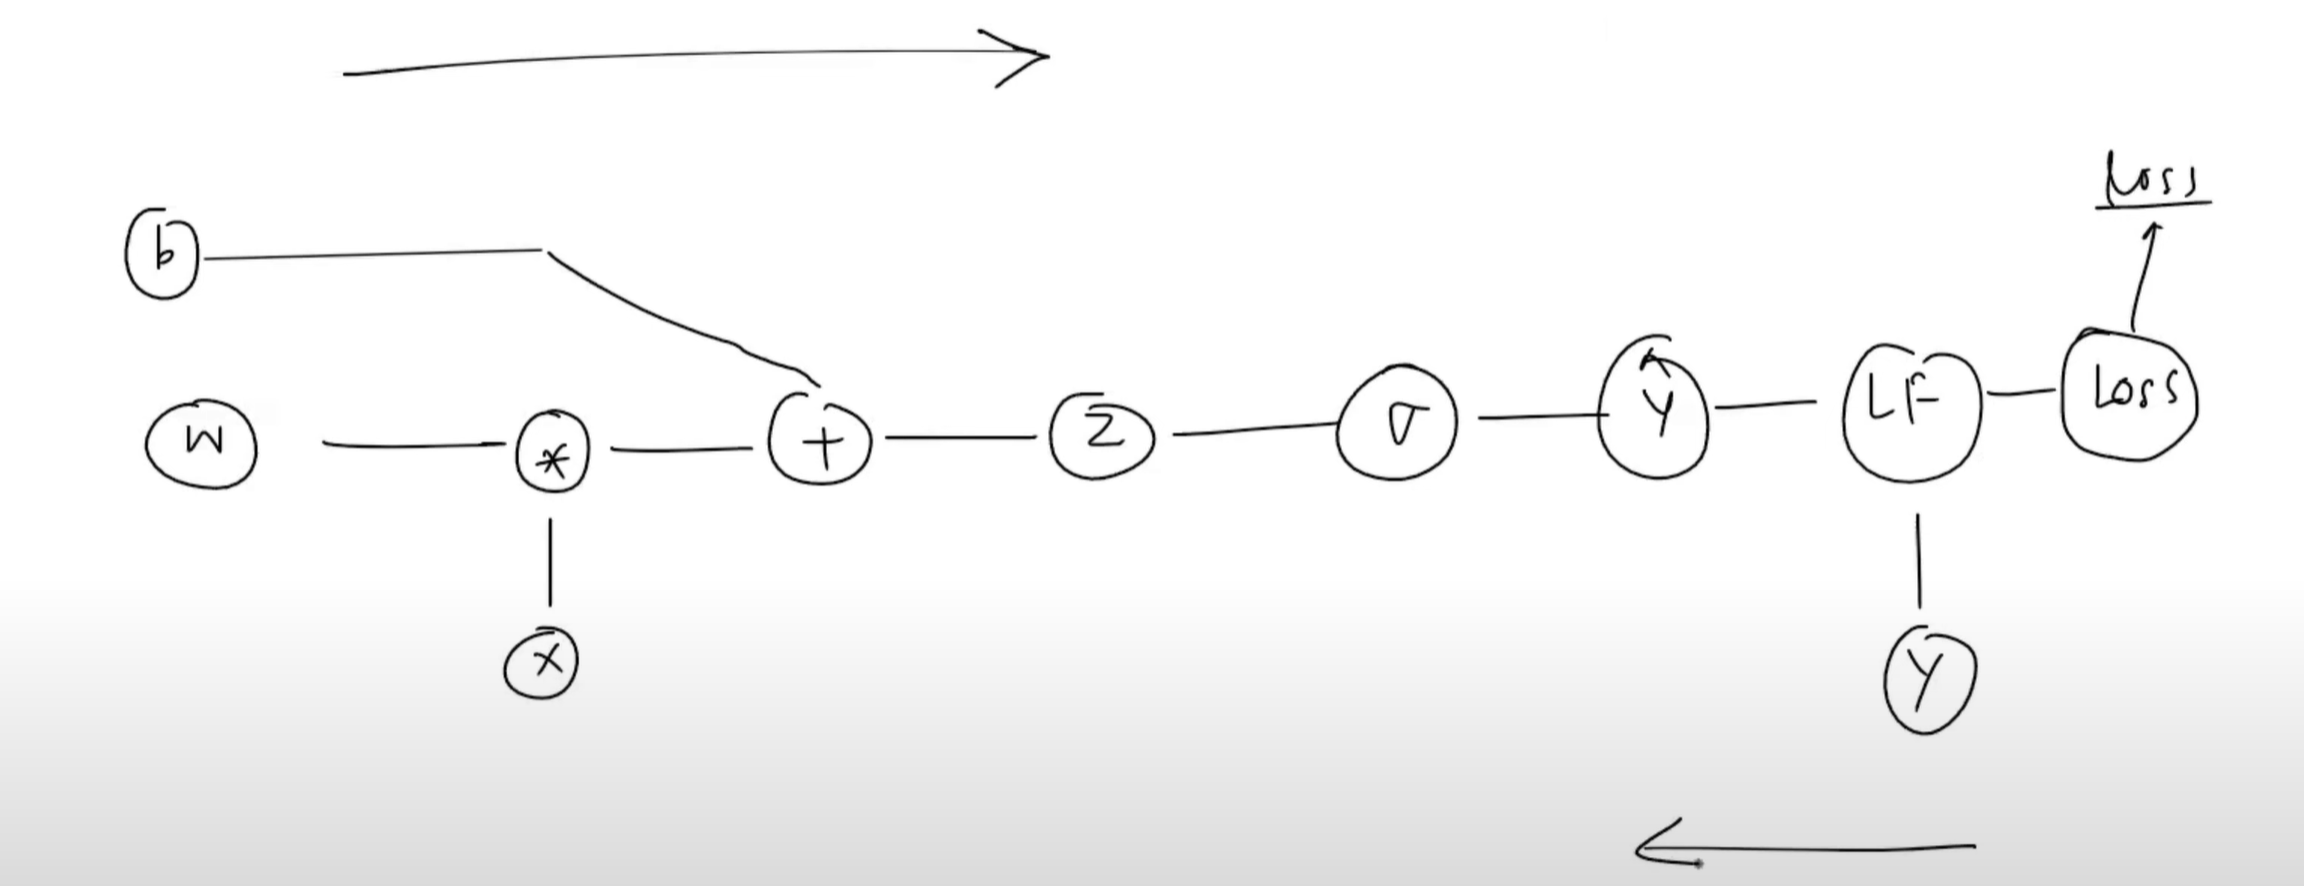

#### **AutoGrad with vector input**

In [44]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
x

tensor([1., 2., 3.], requires_grad=True)

In [47]:
y = (x**2).mean()
y

tensor(4.6667, grad_fn=<MeanBackward0>)

In [48]:
y.backward()

In [49]:
x.grad

tensor([0.6667, 1.3333, 2.0000])

#### **Clearing grad**

In [50]:
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [67]:
y = x ** 2   # Forward Pass
y

tensor(4., grad_fn=<PowBackward0>)

In [68]:
y.backward()   # Backward Pass

In [69]:
x.grad         # First time 4 then 2nd time 8

tensor(4.)

In [71]:
x.grad.zero_()  # This sets the grad to zero to prevent the previous value to be updated with new one

tensor(0.)

#### Disable gradient tracking

In [72]:
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [75]:
y = x ** 2
y

tensor(4., grad_fn=<PowBackward0>)

In [76]:
y.backward()
x.grad

tensor(8.)

In [77]:
# option 1 - requires_grad_(False)
# option 2 - detach()
# option 3 - torch.no_grad()

In [78]:
x.requires_grad_(False)

tensor(2.)

In [79]:
y = x ** 2

In [80]:
y

tensor(4.)

In [81]:
y.backward()   # this produces an error

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [82]:
x = torch.tensor(2.0, requires_grad=True)
x

tensor(2., requires_grad=True)

In [83]:
z = x.detach()     # Contains the same value as that of the x but without any gradient
z

tensor(2.)

In [84]:
y = x ** 2

In [85]:
x = torch.tensor(2.0, requires_grad=True)
with torch.no_grad():
  y = x ** 2
y.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn